In [3]:
%%capture
!pip install -r requirements.txt

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from numpy.random import RandomState
from sklearn import decomposition
from sklearn.svm import SVC
from sklearn import metrics
from time import time

In [6]:
%matplotlib inline
plt.style.use('ggplot')

In [8]:
data=np.load("olivetti_faces.npy")
target=np.load("olivetti_faces_target.npy")

In [9]:
print("There are {} images in the dataset".format(len(data)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each image is {}x{}".format(data.shape[1],data.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(data[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [10]:
print("unique target number : ",np.unique(target))

unique target number :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [11]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

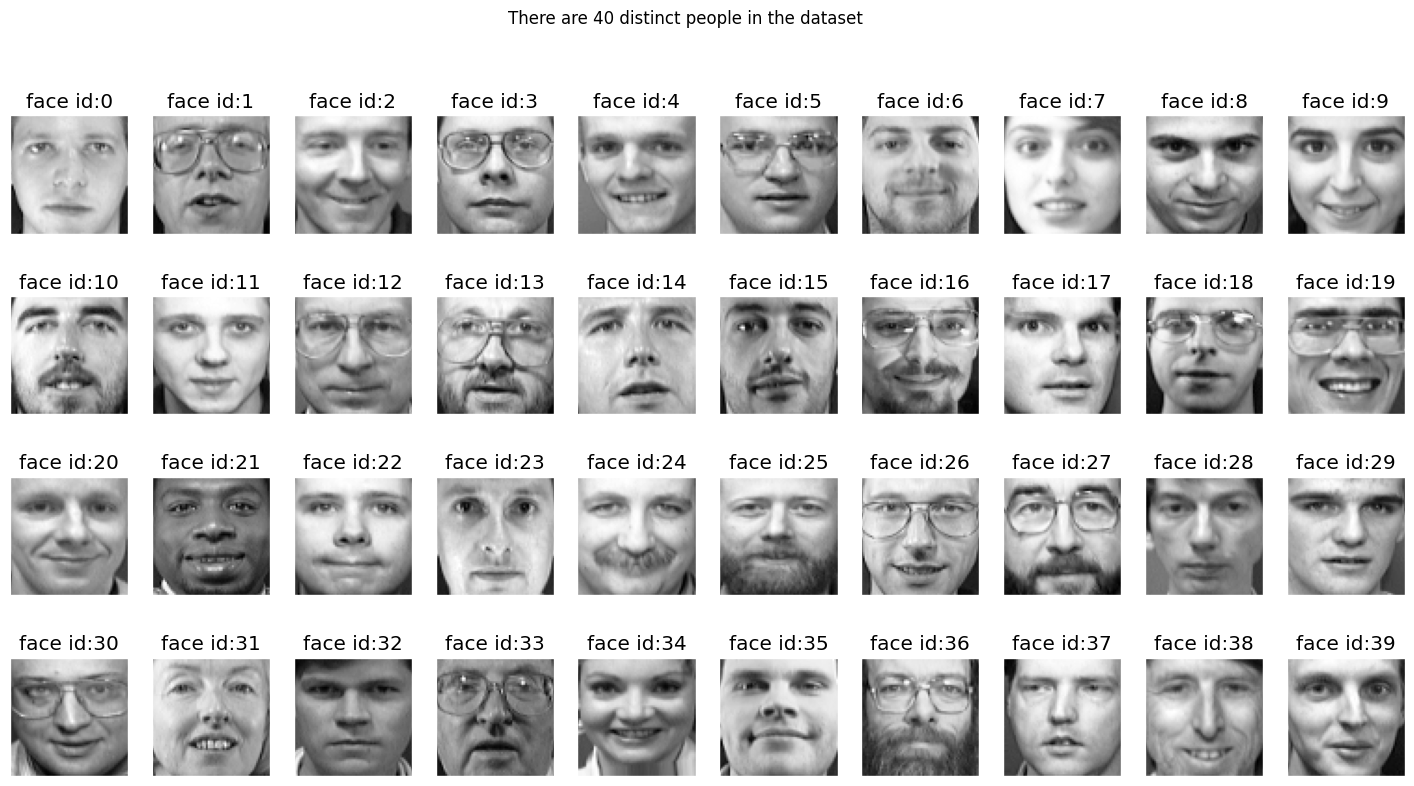

In [12]:
show_40_distinct_people(data, np.unique(target))

In [13]:
def show_10_faces_of_n_subject(images, subject_ids):
    # each subject has 10 distinct face images
    cols=10
    rows=(len(subject_ids)*10)/cols
    rows=int(rows)
    # rowsx10 dimensions
    # print('{} x {}'.format(rows, cols))
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    # axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))

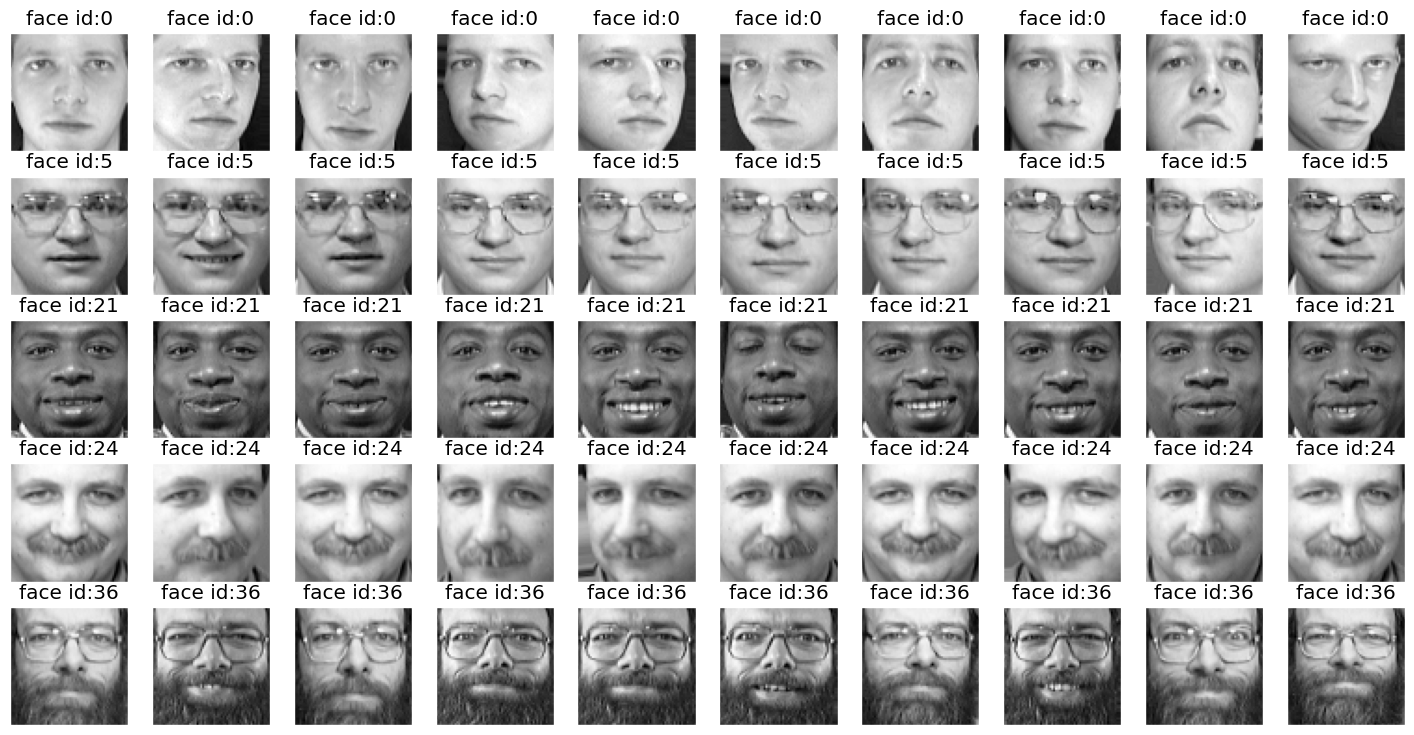

In [14]:
show_10_faces_of_n_subject(images=data, subject_ids=[0, 5, 21, 24, 36])

In [15]:
# We reshape images for machine learnig  model
X = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("data shape:",data.shape)
print("X shape:",X.shape)

data shape: (400, 64, 64)
X shape: (400, 4096)


In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (280, 4096)
y_train shape: (280,)
X_test shape: (120, 4096)
y_test shape: (120,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

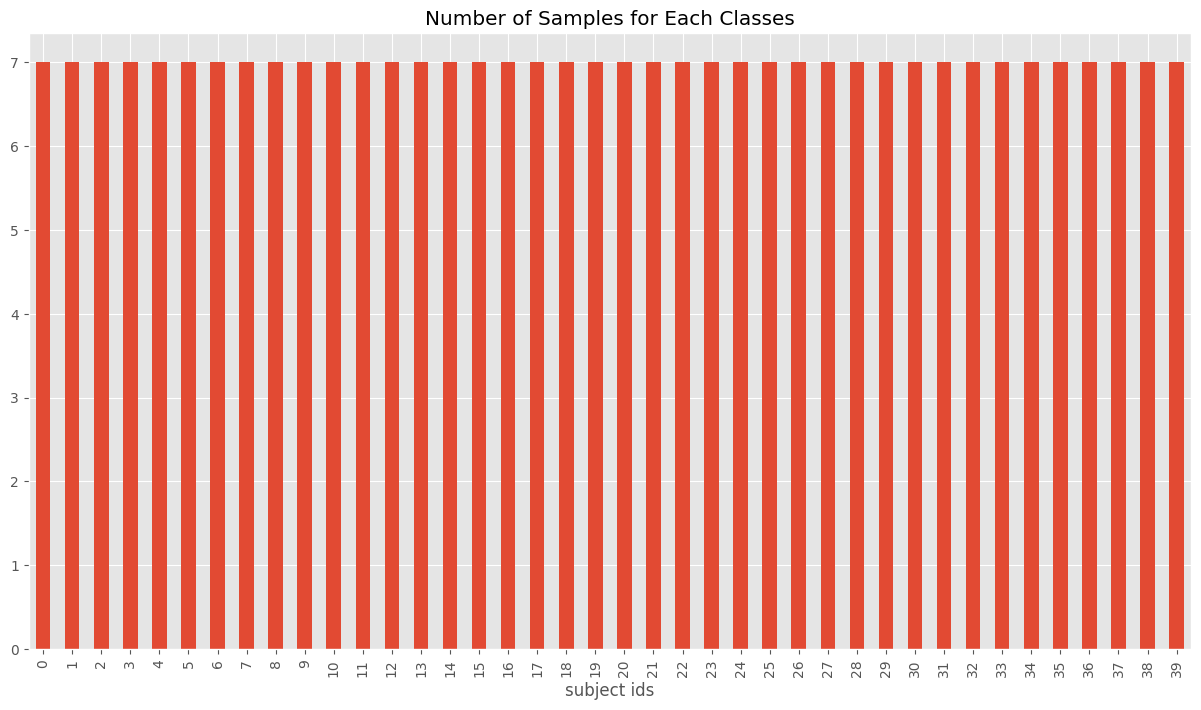

In [17]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [26]:
pca=PCA(n_components=2)
print("=> ", pca)
pca.fit(X)
X_pca=pca.transform(X)
print("=> ", X_pca.shape)
print("=> ", X.shape)

=>  PCA(n_components=2)
=>  (400, 2)
=>  (400, 4096)


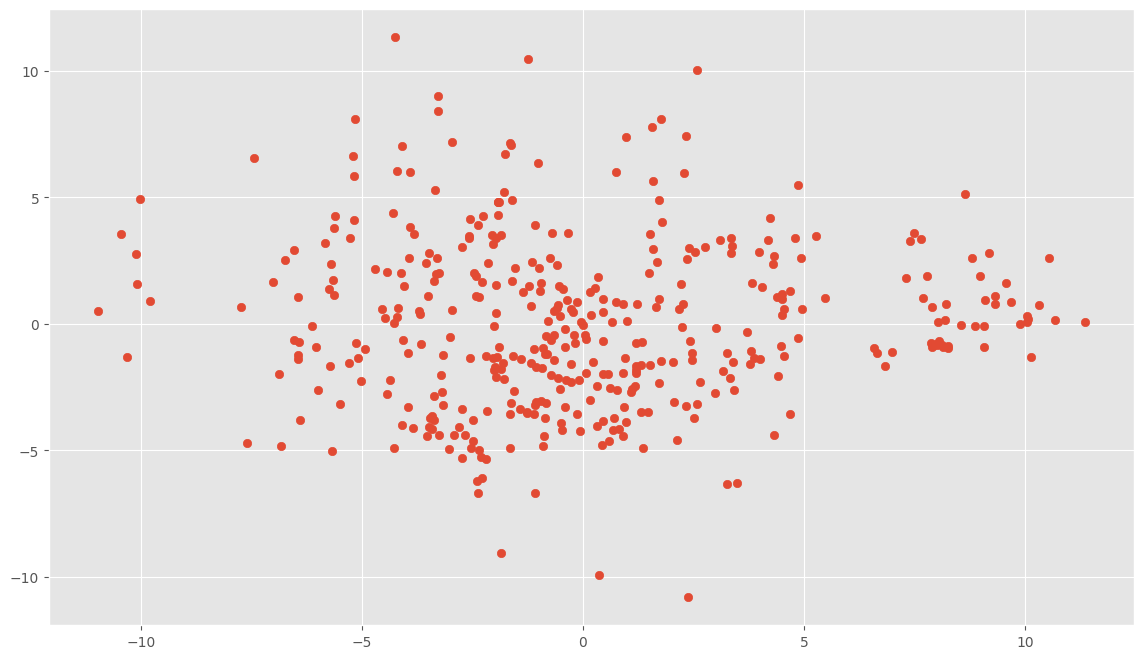

In [27]:
fig, axes = plt.subplots(figsize=(14 ,8))
plt.scatter(x=X_pca[0:, 0], y=X_pca[0:, 1])
plt.show()

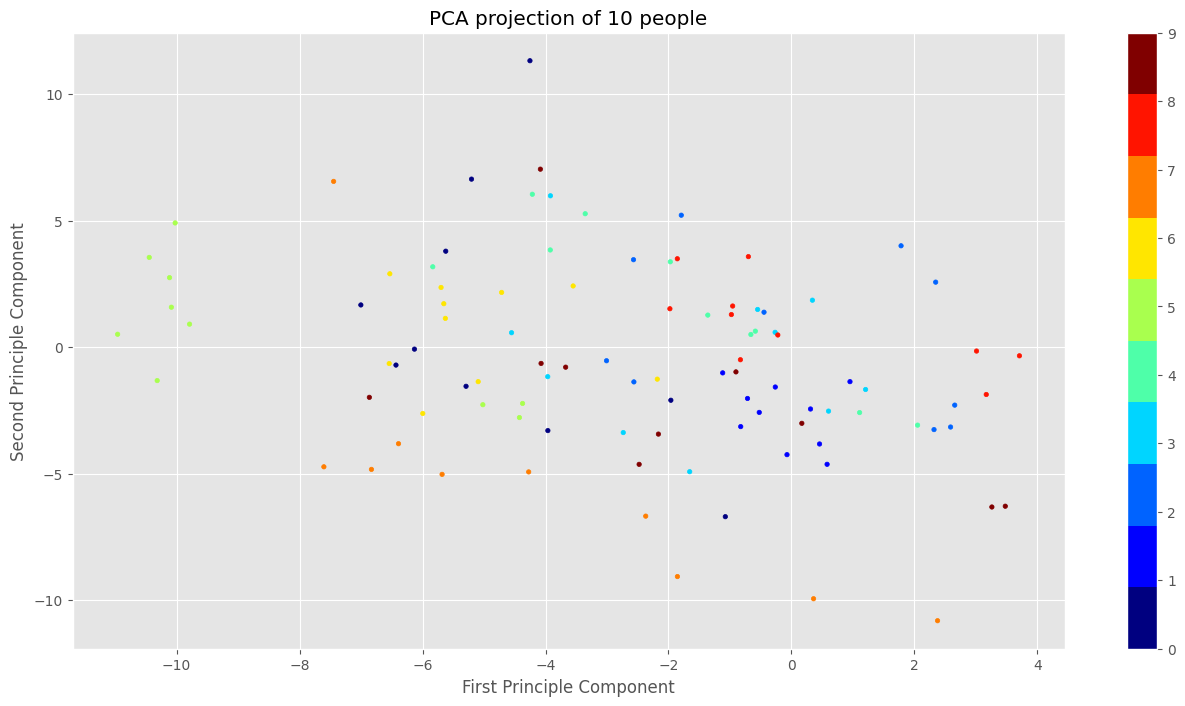

In [28]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=target[:index_range],
            s=10,
            cmap=plt.get_cmap('jet', number_of_people))

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

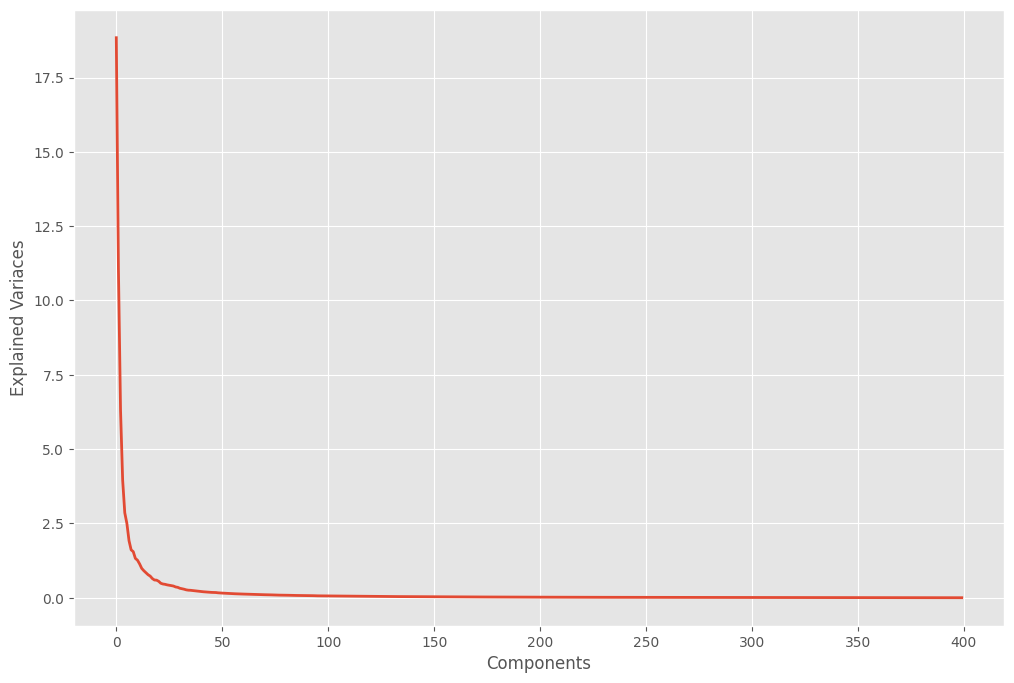

In [29]:
pca=PCA()
pca.fit(X)
plt.figure(1, figsize=(12,8))
# print(pca.explained_variance_)
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [30]:
n_components=90
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

In [ ]:
fig, ax=plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [ ]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

In [33]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [34]:
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

accuracy score:91.67%


<Axes: >

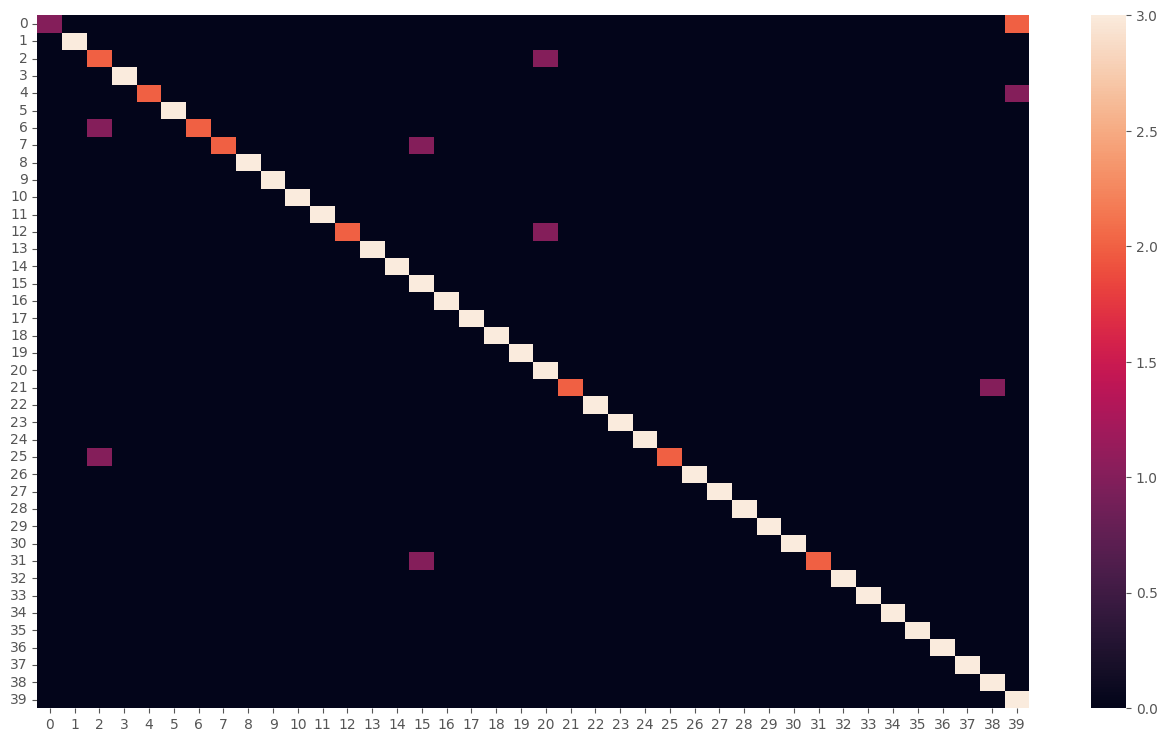

In [35]:
plt.figure(1, figsize=(16, 9))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))